In [143]:
# TensorFlow and tf.keras
import tensorflow as tf
import math
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Constants
NUMBER_OF_TRAINING_SAMPLES = 60000; #decrease if your system can't handle this many, set to -1 to use all
NUMBER_OF_TESTING_SAMPLES = 60000; #decrease if your system can't handle this many, set to -1 to use all

print(tf.__version__)

2.3.0


In [144]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#downsample
step = len(train_images)//NUMBER_OF_TRAINING_SAMPLES
if step <= 0:
    step = 1
train_images = train_images[::step]

step = len(train_labels)//NUMBER_OF_TRAINING_SAMPLES
if step <= 0:
    step = 1
train_labels = train_labels[::step]

step = len(test_images)//NUMBER_OF_TESTING_SAMPLES
if step <= 0:
    step = 1
test_images = test_images[::step]

step = len(test_labels)//NUMBER_OF_TESTING_SAMPLES
if step <= 0:
    step = 1
test_labels = test_labels[::step]

In [145]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [146]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)

10000

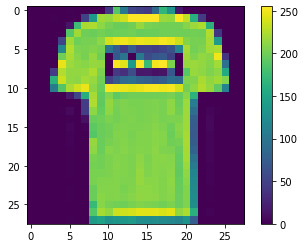

In [147]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [148]:
train_images = train_images / 255.0
test_images = test_images / 255.0

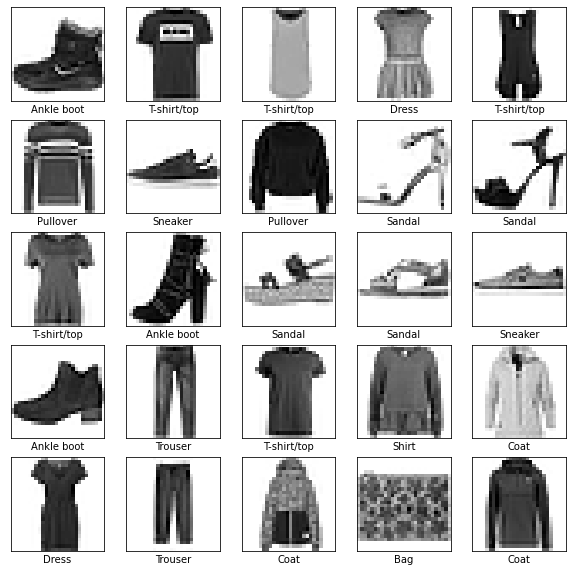

In [149]:
plt.figure(figsize=(10,10))
biggest = 25
if NUMBER_OF_TESTING_SAMPLES < biggest:
    biggest = NUMBER_OF_TESTING_SAMPLES
for i in range(biggest):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [150]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [151]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [152]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4988 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3768 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3381 - accuracy: 0.8763
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3167 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2455 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [153]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3321 - accuracy: 0.8834

Test accuracy: 0.883400022983551


In [154]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

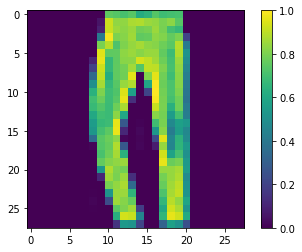

In [155]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [156]:
predictions[5]
np.argmax(predictions[5])
class_names[np.argmax(predictions[5])]
class_names[test_labels[5]]

'Trouser'

In [157]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

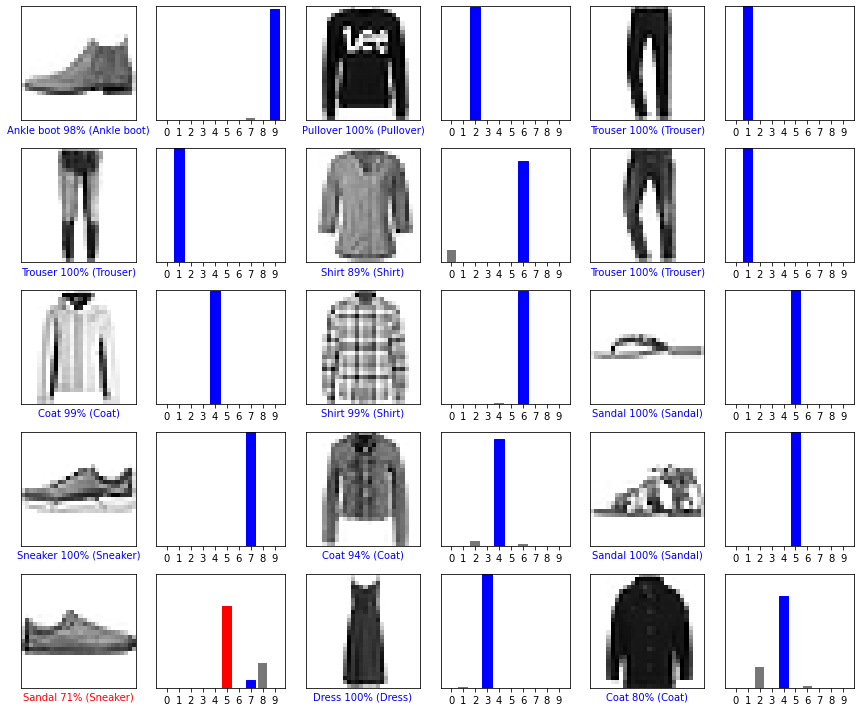

In [158]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

(28, 28)


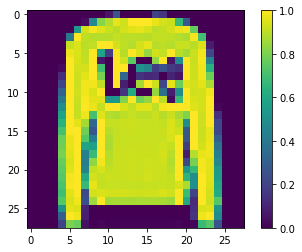

In [159]:
#foo # Grab an image from the test dataset.
img = test_images[1]
print(img.shape)
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [160]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


[[1.6021879e-05 4.1967566e-13 9.9517471e-01 3.8779129e-15 4.4036629e-03
  4.6145748e-13 4.0561499e-04 5.3085173e-13 7.0921415e-13 1.8965081e-12]]


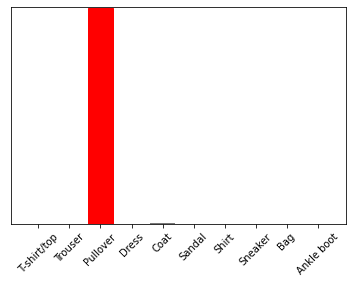

In [161]:
predictions_single = probability_model.predict(img)

print(predictions_single)
plot_value_array(5, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [162]:
class_names[np.argmax(predictions_single[0])]

'Pullover'

In [163]:
from PIL import Image
image = Image.open('Bag.jpg')
print(image.format)
print(image.size)
print(image.mode)
image_2 = image.convert('L')
print(image_2.format)
print(image_2.size)
print(image_2.mode)
image_3 = image_2.resize((28,28))
print(image_3.format)
print(image_3.size)
print(image_3.mode)

JPEG
(3024, 3024)
RGB
None
(3024, 3024)
L
None
(28, 28)
L


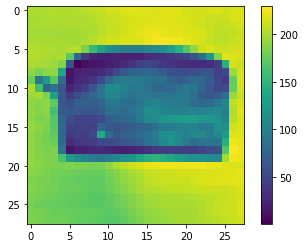

In [164]:
test_me = np.array(image_3)
plt.figure()
plt.imshow(test_me)
plt.colorbar()
plt.grid(False)
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


'Bag'

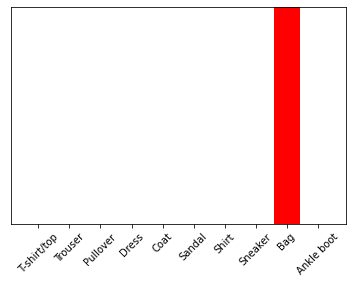

In [165]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(test_me,0))
predictions_single = probability_model.predict(img)
print(predictions_single)
plot_value_array(5, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
class_names[np.argmax(predictions_single[0])]